# Trabalho de Deep Learning - FIAP - Professor Felipe Teodoro

## Alunos

RM 340544 - Mauricio Raghe Binda <br>
RM 341704 - Ricardo da Silva Cruz <br>
RM 340347 - Rodrigo de Miranda Videira  <br>

____

## Exercício 1

## Imports

In [19]:
#!pip install tensorflow

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split

import tensorflow as tf

### a) IRIS

In [2]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
num_classes = len(iris.target_names)
num_features = len(iris.feature_names)

print(f"Número de classes = {num_classes} e número de features = {num_features}")

Número de classes = 3 e número de features = 4


In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.30, random_state=42)

In [5]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [6]:
X_train.shape

(105, 4)

In [26]:
iris_classificacao = tf.keras.Sequential();

In [27]:
iris_classificacao.add(tf.keras.layers.Dense(activation='relu', input_dim=num_features, units=5, kernel_initializer='uniform'))

In [28]:
iris_classificacao.add(tf.keras.layers.Dense(activation='sigmoid', units=num_classes, kernel_initializer='uniform'))

In [29]:
iris_classificacao.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath='modelos/iris.hdf5', verbose=1,  save_best_only=True, monitor='val_accuracy')

In [31]:
hist = iris_classificacao.fit(X_train, y_train, epochs=50, batch_size=2, verbose=1, validation_split=0.2, callbacks=[checkpointer])

Epoch 1/50
39/42 [==========================>...] - ETA: 0s - loss: 1.0964 - accuracy: 0.4872
Epoch 1: val_accuracy improved from -inf to 0.52381, saving model to iris.hdf5
42/42 [==============================] - 9s 88ms/step - loss: 1.0963 - accuracy: 0.4762 - val_loss: 1.0906 - val_accuracy: 0.5238
Epoch 2/50
37/42 [=========================>....] - ETA: 0s - loss: 1.0898 - accuracy: 0.3243
Epoch 2: val_accuracy did not improve from 0.52381
42/42 [==============================] - 0s 11ms/step - loss: 1.0892 - accuracy: 0.3214 - val_loss: 1.0768 - val_accuracy: 0.4762
Epoch 3/50
39/42 [==========================>...] - ETA: 0s - loss: 1.0797 - accuracy: 0.3077
Epoch 3: val_accuracy did not improve from 0.52381
42/42 [==============================] - 1s 21ms/step - loss: 1.0782 - accuracy: 0.3214 - val_loss: 1.0583 - val_accuracy: 0.4762
Epoch 4/50
41/42 [============================>.] - ETA: 0s - loss: 1.0596 - accuracy: 0.3293
Epoch 4: val_accuracy did not improve from 0.52381
42

Epoch 30/50
41/42 [============================>.] - ETA: 0s - loss: 0.4142 - accuracy: 0.9512
Epoch 30: val_accuracy did not improve from 1.00000
42/42 [==============================] - 0s 10ms/step - loss: 0.4118 - accuracy: 0.9524 - val_loss: 0.4328 - val_accuracy: 1.0000
Epoch 31/50
39/42 [==========================>...] - ETA: 0s - loss: 0.4089 - accuracy: 0.9615
Epoch 31: val_accuracy did not improve from 1.00000
42/42 [==============================] - 1s 16ms/step - loss: 0.4017 - accuracy: 0.9524 - val_loss: 0.4194 - val_accuracy: 1.0000
Epoch 32/50
40/42 [===========================>..] - ETA: 0s - loss: 0.3872 - accuracy: 0.9750
Epoch 32: val_accuracy did not improve from 1.00000
42/42 [==============================] - 1s 20ms/step - loss: 0.3930 - accuracy: 0.9643 - val_loss: 0.4198 - val_accuracy: 1.0000
Epoch 33/50
34/42 [=======================>......] - ETA: 0s - loss: 0.3904 - accuracy: 0.9559
Epoch 33: val_accuracy did not improve from 1.00000
42/42 [===============

In [32]:
iris_classificacao_best = tf.keras.models.load_model('modelos/iris.hdf5')

In [33]:
test_results = iris_classificacao_best.evaluate(X_test, y_test, verbose=1)
print(f'Resultado dos testes - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

2/2 [==============================] - 2s 17ms/step - loss: 0.4088 - accuracy: 0.9778
Resultado dos testes - Loss: 0.4088364839553833 - Accuracy: 0.9777777791023254%


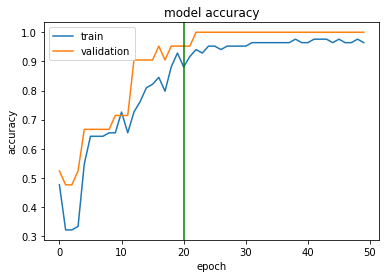

In [38]:
plt.figure(1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

# Melhor época - 23
plt.axvline(x=20, ymin=0, ymax=1, c='green')

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [35]:
# Testando uma amostra
amostra_iris = X_test[20]
amostra_iris.reshape(1,4)

array([[4.7, 3.2, 1.6, 0.2]])

In [36]:
print(y_test[20])
print(iris.target_names)

# Classe correta - Setosa

[1. 0. 0.]
['setosa' 'versicolor' 'virginica']


In [37]:
iris_classificacao_best.predict(amostra_iris.reshape(1,4)) # 0.798 PROB na classe correta, que é a Setosa

1/1 [==============================] - 1s 944ms/step


array([[0.7984895 , 0.39452744, 0.11810607]], dtype=float32)

____